g(0,0) =
[0, 0]
3.141592653589793


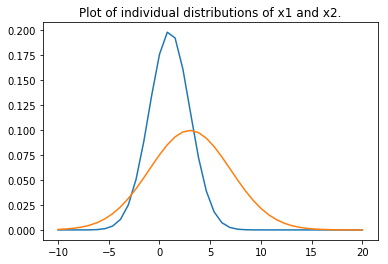

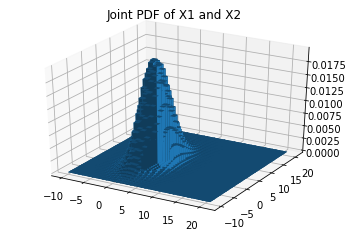

In [27]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import math
%matplotlib inline

# X1 ~ N(mu=1, sigma=2)
# X2 ~ N(mu=3, sigma=4)

# Two functions of two parameters
def g1(x1, x2): return 5*x1 + 6*x2
def g2(x1, x2): return 7*x1 + 8*x2

# Vector valued function of vector parameter
def g(x):
    [x1, x2] = x
    return [g1(x1, x2), g2(x1, x2)]

# Vector
x = [0,0]

print("g(0,0) =")
print(g(x))
print(math.pi)

def f_X1(x):
    mu = 1
    sigma = 2
    return 1/math.sqrt(2 * math.pi) / sigma * math.exp(-(x-mu)**2/2/sigma**2)

def f_X2(x):
    mu = 3
    sigma = 4
    return 1/math.sqrt(2 * math.pi) / sigma * math.exp(-(x-mu)**2/2/sigma**2)

def f_X1X2(x1, x2):
    return f_X1(x1)*f_X2(x2)

x1s = np.linspace(-10, 20, 40)
f1s = [f_X1(x) for x in x1s]
x2s = np.linspace(-10, 20, 40)
f2s = [f_X2(x) for x in x2s]
plt.plot(x1s, f1s, x2s, f2s)
plt.title("Plot of individual distributions of x1 and x2.")

# Create grid
x1_grid, x2_grid = np.meshgrid(x1s, x2s)
# Flatten and overwrite
x1_grid = x1_grid.flatten()
x2_grid = x2_grid.flatten()
#print(x1_grid)
#print(x2_grid)

# Evaluate at each point 
f_grid = [f_X1X2(x1, x2) for x1, x2 in zip(x1_grid, x2_grid)]
#print(f_grid)

# Plot 3D histogram out of three flattened lists
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.bar3d( x1_grid,
          x2_grid,
          np.zeros(len(f_grid)),
          1, 1, f_grid )
plt.title("Joint PDF of X1 and X2")
#
# Finally, display the plot.
#
plt.show()


[[ 1  1]
 [ 1 -1]]
[[ 0.5  0.5]
 [ 0.5 -0.5]]


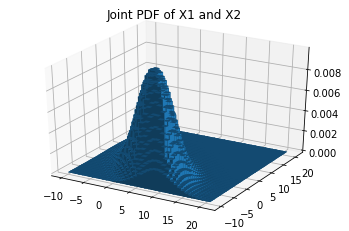

In [31]:
# Now express joint PDF of Z1 and Z2

# Matrix of the transformation Z = A * X

A = np.array([[1,1],[1,-1]])
A_inv = np.linalg.inv(A)
print(A)
print(A_inv)

def g(x):
    return A.dot(x)

def g_inv(z):
    return A_inv.dot(z)

def f_Z1Z2(z1, z2):
    (x1, x2) = g_inv(np.array([z1,z2]))
    J_inv = np.linalg.det(A_inv)
    return f_X1X2(x1,x2)*abs(J_inv)

# Evaluate at each point 
f_grid = [f_Z1Z2(z1, z2) for z1, z2 in zip(x1_grid, x2_grid)]
#print(f_grid)

# Plot 3D histogram out of three flattened lists
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.bar3d( x1_grid,
          x2_grid,
          np.zeros(len(f_grid)),
          1, 1, f_grid )
plt.title("Joint PDF of X1 and X2")
#
# Finally, display the plot.
#
plt.show()


    